# Práctica 8

## Ejercicio 1

Sea $X_1, \dots, X_n$ una muestra aleatoria de una población normal.

### Pregunta A

Encontrar un intervalo de confianza de nivel exacto $1−\alpha$ para la media cuando la varianza es conocida.

$\bar{X} \pm z_{\alpha/2} \tfrac{\sigma}{\sqrt{n}}$

### Pregunta B

Con cierto instrumento se realizan 20 mediciones de una magnitud física $\mu$. Cada observación es de la forma $X_i = \mu + \epsilon_i$, donde $\epsilon_i$ denota el error aleatorio de la i-ésima medición. El promedio de los valores obtenidos es $x = 25.01$. Supongamos que los errores de medición tienen distribución normal con media cero y varianza 0.36.

#### Item i

Hallar el intervalo de confianza estimado de nivel exacto 0.95 para el valor de la magnitud física de interés.

Si el intervalo de confianza tiene nivel 0.95 entonces $0.95 = 1 - \alpha \iff \alpha = 0.05$.

Antes de usar la fórmula, necesitamos saber el valor de $z_{\alpha/2}$. Hay muchas formas de entender esto.

Como queremos el intervalo de confianza de nivel 0.95, esto significa que queremos el 0.95 de probabilidad (o de área si lo pensamos en términos de la integral de la distribución) en el intervalo $[-z_{\alpha/2}, z_{\alpha/2}]$. Es clave el hecho de que la distribución normal es simétrica, y puntualmente en este caso, $Z \sim \mathcal{N}(0,1)$, o sea el eje de simetría está en el 0.

Consecuentemente, el resto de la probabilidad (recordemos que tiene que sumar 1), es decir, $1 - 0.95 = 0.05 = \alpha$, hay que repartirlo a cada extremo de este intervalo. Por eso es que usamos el subíndice $\alpha/2$ ya que hacia la derecha de $z_{\alpha/2}$ tenemos $\alpha/2$ de probabilidad o área, y análogamente, a la izquierda de $-z_{\alpha/2}$ también tenemos $\alpha/2$ de probabilidad o área.

Entonces, para encontrar el valor de $z_{\alpha/2}$ tenemos que deducir cuál es el cuantil que buscamos. En el intervalo $[-\infty, -z_{\alpha/2}]$ tenemos probabilidad o área $\alpha/2$, y luego en el intervalo $[-z_{\alpha/2}, z_{\alpha/2}]$ tenemos probabilidad o área $1 - \alpha$. Por lo tanto el cuantil que nos interesa es el $\alpha/2 + 1 - \alpha = 1 - \alpha/2 = 1 - 0.05/2 = 0.975$.

Ahora podemos buscar $z_{\alpha/2}$ en la tabla o con R. Lo que buscamos, en términos de un $\alpha$ arbitrario, es $z_{\alpha/2}$ tal que $\Phi(z_{\alpha/2}) = 1 - \alpha/2 \iff z_{\alpha/2} = \Phi^{-1}(1 - \alpha/2)$.

In [218]:
n = 20
Xbar = 25.01
sd = sqrt(0.36)
alpha = 0.05
z = qnorm(1 - alpha / 2)
c(Xbar - z * sd / sqrt(n), Xbar + z * sd / sqrt(n))

[1] 24.74704 25.27296

#### Item ii

Si se quisiera que la longitud del intervalo hallado en i) fuera a lo sumo 0.05, ¿cuántas mediciones deberían realizarse?

$
\bar{X} + z_{\alpha/2} \tfrac{\sigma}{\sqrt{n}} - (\bar{X} - z_{\alpha/2} \tfrac{\sigma}{\sqrt{n}}) <= 0.05 \\
\iff \bar{X} + z_{\alpha/2} \tfrac{\sigma}{\sqrt{n}} - \bar{X} + z_{\alpha/2} \tfrac{\sigma}{\sqrt{n}} <= 0.05 \\
\iff 2 z_{\alpha/2} \tfrac{\sigma}{\sqrt{n}} <= 0.05 \\
\iff \tfrac{2}{0.05} z_{\alpha/2} \sigma <= \sqrt{n} \\
\iff (40 z_{\alpha/2} \sigma)^2 <= n \\
$

In [220]:
targetLength = 0.05
ceiling(((2 / targetLength) * z * sd)^2)

[1] 2213

$\implies$ Se deberían realizar 2213 mediciones.

#### Item iii

Suponga ahora que la varianza del error es 0.6. ¿cuántas mediciones deberían realizarse para construir un intervalo de confianza exacto de nivel 0.95 para $\mu$ cuya longitud fuera a lo sumo 0.05?

In [222]:
sd = sqrt(0.6)
ceiling(((2 / targetLength) * z * sd)^2)

[1] 3688

$\implies$ Se deberían realizar 3688 mediciones.

#### Item iv

Compare los resultados obtenidos en los items ii) y iii) e interprete la diferencia.

Al tener una varianza más grande, hay más dispersión en las mediciones, y por lo tanto se obtiene un intervalo de confianza más grande. Consecuentemente se necesita una muestra más grande para mantener la misma longitud del intervalo de confianza.

## Ejercicio 2

Consideremos variables aleatorias $X_1, \dots, X_n$ con distribución $\mathcal{N}(\mu, \sigma^2)$. En este ejercicio estudiaremos la distribución de $T_n = (\bar{X}_n - \mu)\tfrac{\sqrt{n}}{s}$ para diferentes valores de $n$. Para ello, para diferentes valores de $n$, y un $\mu$ y un $\sigma$ dados, simularemos 1000 conjuntos de $n$ datos con distribución $\mathcal{N}(\mu, \sigma^2)$ y luego calcularemos el estadístico $T_n$ para cada conjunto de datos. Obtendremos así 1000 realizaciones de la variable $T_n$. Finalmente, haremos boxplots, qqplots, e histogramas de las 1000 realizaciones de $T_n$ para estudiar su densidad.

Generar los valores con distribución $\mathcal{N}(1, 4)$ y computar el valor que toma el estadístico $T_n$ para esos valores observados, $T_{nobs}$. Replicar 1000 veces, guardando los resultados en un vector de longitud 1000.

Repetir para $n = 4, 20, 30, 500$ y comparar los resultados.

Ver [este video](https://www.youtube.com/watch?v=bFefxSE5bmo&list=PLvxOuBpazmsMdPBRxBTvwLv5Lhuk0tuXh&index=8) que tiene una explicación copada (inglés).

In [316]:
N = 1000 # Cantidad de muestras
n = 500 # Tamaño de cada muestra
mu = 1
sd = 4

muestras = replicate(N, rnorm(n, mu, sd), simplify=FALSE)
Tnobs = sapply(muestras, function(X) (mean(X) - mu) / (sqrt(n) / sd(X)))

### Pregunta A

Hacer un boxplot y un qqplot del conjunto de valores de $T_{nobs}$. ¿Qué se observa?

Que $T_{nobs}$ tiene una distribución simétrica que parece normal cuanto más grande sea $n$.

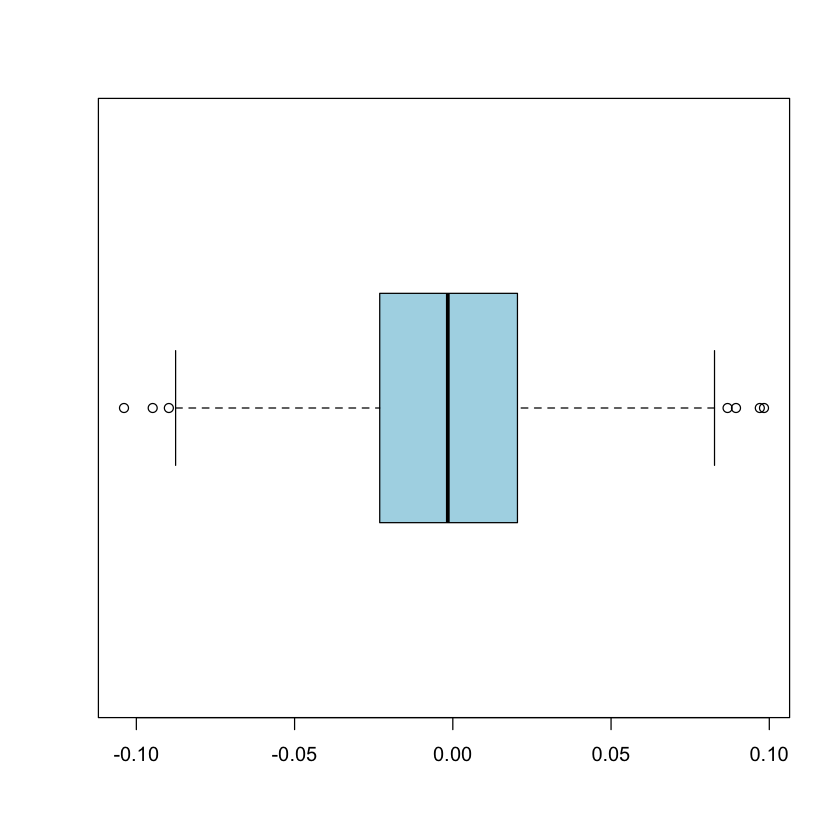

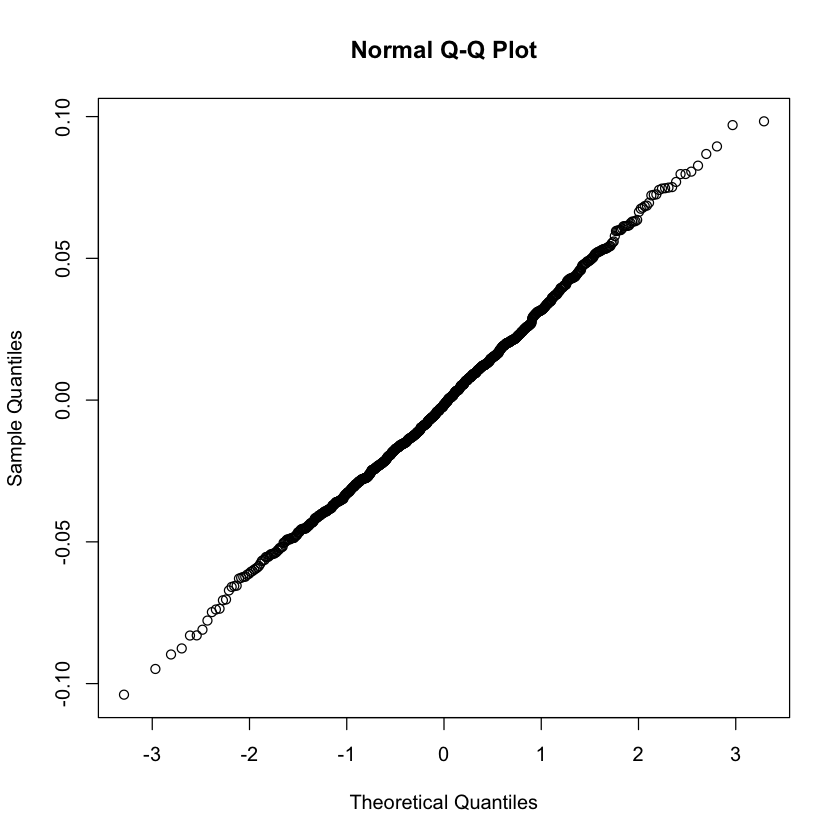

In [317]:
boxplot(Tnobs, horizontal=TRUE, col='lightblue')
qqnorm(Tnobs)

### Pregunta B

A partir de los valores replicados de $T_{nobs}$ realizar un histograma. ¿Qué características tiene este histograma?

Que $T_{nobs}$ parece aproximar una distribución normal cuando $n$ es grande.

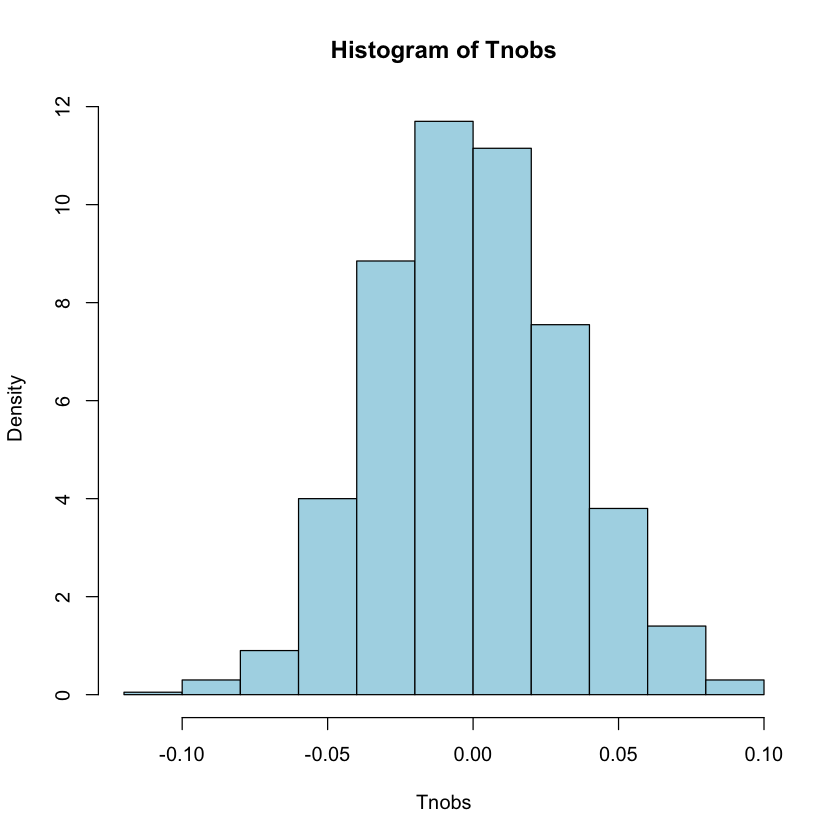

In [318]:
hist(Tnobs, prob=TRUE, col='lightblue')

### Pregunta C

Al histograma del item anterior, superponerle el gráfico de la densidad normal estándar. Superponer también el gráfico de la verdadera densidad de la variable $T_n$. ¿Qué se observa?

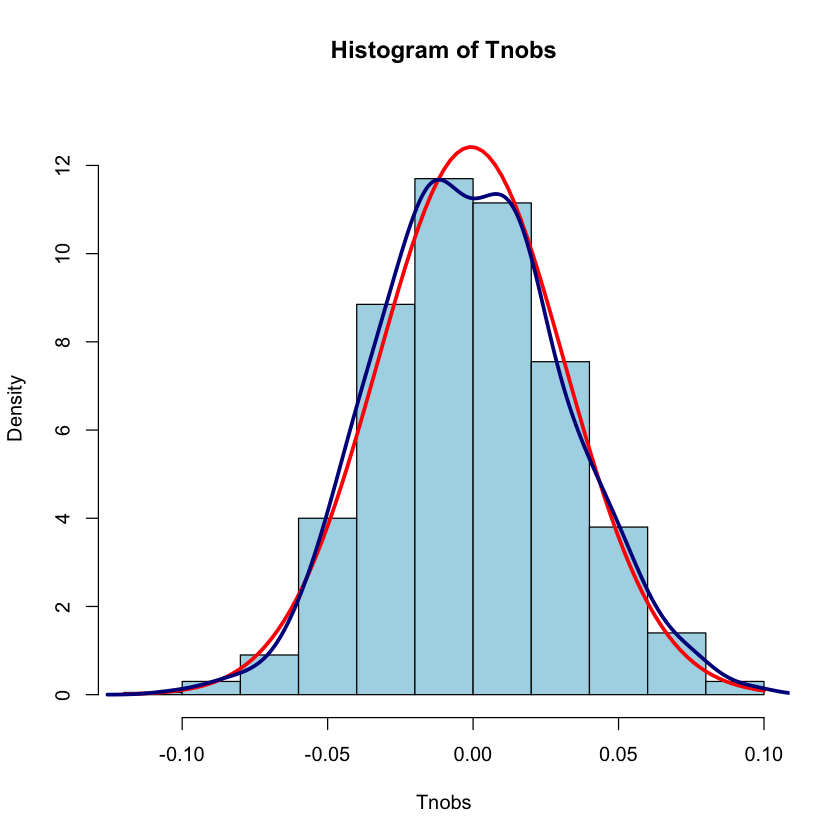

In [370]:
hist(Tnobs, prob=TRUE, col='lightblue', ylim=c(0, 13))
curve(dnorm(x, mean(Tnobs), sd(Tnobs)), col='red', lwd=3, add=TRUE)
lines(density(Tnobs), col='darkblue', lwd=3)

### Pregunta D

Con el comando `density`, dibujar la densidad estimada de $T_n$. En el mismo gráfico, superponer la verdadera densidad de $T_n$ y la curva normal estándar. ¿Qué se observa?

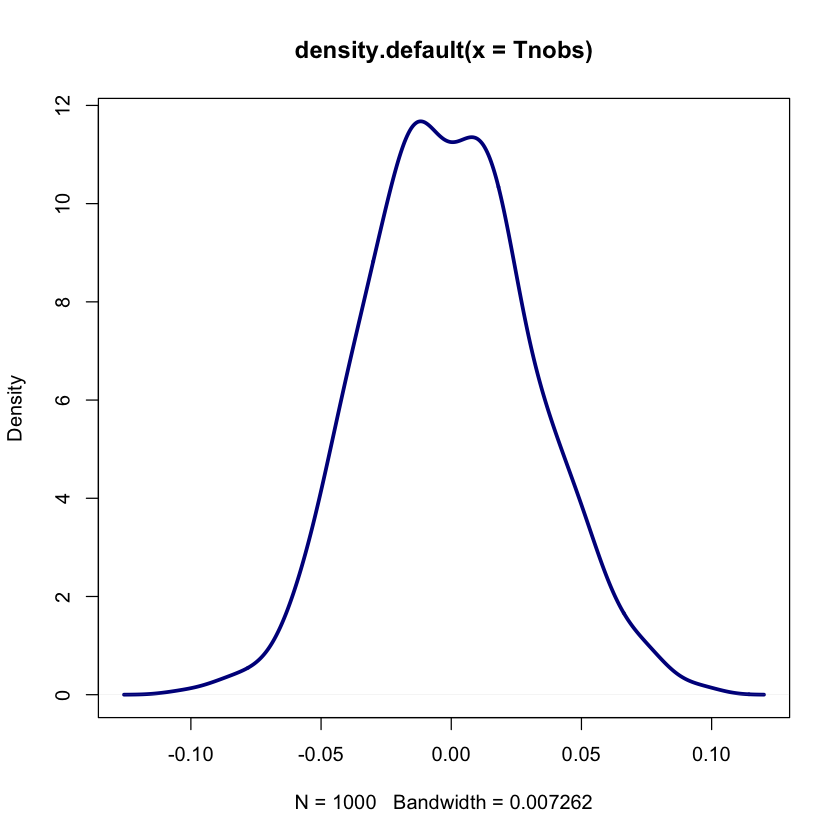

In [373]:
plot(density(Tnobs), col='darkblue', lwd=3)

## Ejercicio 3

Sea $X_1, \dots, X_n$ una muestra aleatoria de una población normal.

### Pregunta A

Encontrar un intervalo de confianza de nivel exacto $1-\alpha$ para la media cuando la varianza es desconocida.

$\bar{X} \pm t_{n-1,\alpha/2} \sqrt{\tfrac{S^2}{n}}$

Recordar que $S^2$ es la varianza muestral: $S^2 = \tfrac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2$

### Pregunta B

Repetir la parte i) del item b) del Ejercicio 1, suponiendo que la varianza es desconocida y el desvío estándar muestral es $s = 0.76$.

In [375]:
n = 20
Xbar = 25.01
sd = 0.76
alpha = 0.05
t = qt(1 - alpha / 2, n - 1)
c(Xbar - t * sd / sqrt(n), Xbar + t * sd / sqrt(n))

[1] 24.65431 25.36569

## Ejercicio 4

El rendimiento anual de almendros (en kg.) en parcelas cultivadas en cierta región es una variable aleatoria con distribución normal de media $\mu$ y varianza $\sigma^2$. Se observa el rendimiento anual de $n = 5$ parcelas elegidas al azar y se obtiene una media muestral de 525 kilogramos y un desvío muestral de 10 kilogramos.

### Pregunta A

En base a los datos obtenidos, obtenga una estimación por intervalos para $\mu$ utilizando un procedimiento de nivel 0.95.

In [376]:
n = 5
Xbar = 525
sd = 10
alpha = 0.05
t = qt(1 - alpha / 2, n - 1)
c(Xbar - t * sd / sqrt(n), Xbar + t * sd / sqrt(n))

[1] 512.5834 537.4166

### Pregunta B

Decidir si son verdaderas o falsas las siguientes afirmaciones:

#### Item i

Aproximadamente el 95% de las parcelas de esta región tiene un rendimiento que pertenece al intervalo hallado en a), en base a la muestra observada.

**Falso**

El intervalo de confianza nos da información sobre la media $\mu$ pero no podemos inferir nada sobre el total de las parcelas, el intervalo de confianza no nos dice nada sobre la distribución de las parcelas (que es lo que necesitamos saber para decir que el 95% de ellas tienen un rendimiento en particular).

#### Item ii

La probabilidad de que el intervalo hallado en a) contenga a $\mu$ es 0.95.

**Verdadera**

#### Item iii

Si se extraen muchas muestras de tamaño 5 de manera independiente y para cada una se calcula el intervalo de confianza como en a), aproximadamente el 95% de estos intervalos contendrá a $\mu$.

**Verdadera**

## Ejercicio 5

Sea $X_1, \dots, X_n$ una muestra aleatoria de una población normal.

### Pregunta A

Encontrar un intervalo de confianza de nivel exacto $1-\alpha$ para la varianza cuando la media es conocida.

Sugerencia: probar que $\sum_{i=1}^{n} \tfrac{(X_i - \mu)^2}{\sigma^2} \sim \mathcal{X}_n^2$

$\Big[ \frac{\sum_{i=1}^n (X_i - \mu)^2}{\mathcal{X}^2_{n,1-\alpha/2}}, \frac{\sum_{i=1}^n (X_i - \mu)^2}{\mathcal{X}^2_{n,\alpha/2}} \Big]$

### Pregunta B

En un aserradero se cortan varillas de madera cuya longitud es una v.a. con distribución normal. Se miden 25 varillas elegidas al azar, obteniéndose las siguientes longitudes.

```
176.50 191.50 186.90 181.10 195.70 188.10 187.40 185.10 176.90 191.20 193.80 187.00 179.00 173.00 184.40 199.60 190.40 206.80 193.00 177.10 201.00 192.50 176.60 180.10 186.40
```

Hallar el intervalo de confianza estimado de nivel exacto 0.90 para la varianza verdadera, suponiendo que $\mu = 185$.

In [377]:
X = c(176.50, 191.50, 186.90, 181.10, 195.70, 188.10, 187.40, 185.10, 176.90, 191.20, 193.80, 187.00, 179.00, 173.00, 184.40, 199.60, 190.40, 206.80, 193.00, 177.10, 201.00, 192.50, 176.60, 180.10, 186.40)
n = length(X)
mu = 185
alpha = 0.1
c(sum((X - mu)^2) / qchisq(1 - alpha/2, n), sum((X - mu)^2) / qchisq(alpha/2, n))

[1]  49.97784 128.78910

## Ejercicio 6

Sea $X_1, \dots, X_n$ una muestra aleatoria de una población normal.

### Pregunta A

Encontrar un intervalo de confianza de nivel exacto $1-\alpha$ para la varianza cuando la media es desconocida.

$\Big[ \frac{(n-1)S^2}{\mathcal{X}^2_{n-1,1-\alpha/2}}, \frac{(n-1)S^2}{\mathcal{X}^2_{n-1,\alpha/2}} \Big]$

### Pregunta B

Repetir el item b) del Ejercicio 5 suponiendo que $\mu$ es desconocida.

In [147]:
X = c(176.50, 191.50, 186.90, 181.10, 195.70, 188.10, 187.40, 185.10, 176.90, 191.20, 193.80, 187.00, 179.00, 173.00, 184.40, 199.60, 190.40, 206.80, 193.00, 177.10, 201.00, 192.50, 176.60, 180.10, 186.40)
n = length(X)
alpha = 0.1
c((n - 1) * var(X) / qchisq(1 - alpha/2, n - 1), (n - 1) * var(X) / qchisq(alpha/2, n - 1))

[1]  48.21915 126.79432

## Ejercicio 7

### Pregunta A

Definir una función que, tenga por input un conjunto de datos $x = (x_1, \dots, x_n)$ provenientes de una distribución normal y un nivel de confianza $1-\alpha$ y devuelva un intervalo de confianza de nivel $1-\alpha$ para la media de la normal de la que provienen los datos. ¿Cómo cambiaría la función si ahora queremos aplicarla a normales con varianza conocida? ¿Y si ahora queremos aplicarla a muestras grandes pero con distribución desconocida?

In [517]:
ci.mu = function(X, alpha, sd=NULL) {
    n = length(X)
    Xbar = mean(X)
    if (is.null(sd)) {
        sd = sd(X)
        t = qt(1 - alpha / 2, n - 1)
        return(c(Xbar - t * sd / sqrt(n), Xbar + t * sd / sqrt(n)))
    } else {
        z = qnorm(1 - alpha / 2)
        return(c(Xbar - z * sd / sqrt(n), Xbar + z * sd / sqrt(n)))
    }
}

### Pregunta B

Elegir un valor de $\mu$ y un valor de $\sigma$. Generar 1000 conjuntos de datos de $n$ valores cada uno con distribución $\mathcal{N}(\mu, \sigma^2)$ y calcular intervalos de confianza para $\mu$ asumiendo que $\mu$ es desconocido y $\sigma$ es conocido. Repetir para diferentes valores de $n$ entre 3 y 1000. ¿Qué proporción de intervalos contiene al verdadero valor de $\mu$?

In [527]:
N = 1000 # Cantidad de muestras
n = 30 # Tamaño de cada muestra
mu = 5
sd = 1
alpha = 0.05

muestras = replicate(N, rnorm(n, mu, sd), simplify=FALSE)
intervalosValidos = 0
for (X in muestras) {
    ci = ci.mu(X, alpha, sd)
    if (ci[1] <= mu && mu <= ci[2]) {
        intervalosValidos = intervalosValidos + 1
    }
}
intervalosValidos / N

[1] 0.961

### Pregunta C

Rehacer el item anterior calculando también, para cada conjunto de datos, el intervalo de confianza para $\mu$ con $\sigma$ desconocido. Para valores grandes de $n$, ¿de qué otra forma podría calcular los intervalos de confianza? Calcular los tres intervalos para cada muestra y compararlos.

### Pregunta D

Rehacer los dos items anteriores pero, en lugar de datos provenientes de una normal, generar datos provenientes de una $\mathcal{U}(0,1)$. Interpretar.

In [559]:
N = 1000 # Cantidad de muestras
n = 30 # Tamaño de cada muestra
mu = 0.5
alpha = 0.05

muestras = replicate(N, runif(n, 0, 1), simplify=FALSE)
intervalosValidos = 0
for (X in muestras) {
    ci = ci.mu(X, alpha)
    if (ci[1] <= mu && mu <= ci[2]) {
        intervalosValidos = intervalosValidos + 1
    }
}
intervalosValidos / N

[1] 0.962

## Ejercicio 8

Sea $X_1, \dots, X_n$ una muestra aleatoria de una población $\mathcal{E}(\lambda)$.

### Pregunta A

Probar que $2\lambda \sum_{i=1}^n X_i$ tiene distribución $\mathcal{X}_{2n}^2$

*Ver el apunte de Bianco y Martínez (2004), página 186.*

### Pregunta B

Hallar un intervalo de confianza para $\lambda$ de nivel exacto $1-\alpha$.

$\Big[ \frac{\mathcal{X}^2_{2n, \alpha/2}}{2\sum_{i=1}^n X_i}, \frac{\mathcal{X}^2_{2n, 1-\alpha/2}}{2\sum_{i=1}^n X_i} \Big]$

### Pregunta C

¿Cuál sería el intervalo de confianza de nivel exacto $1-\alpha$ para $E(X_1)$? ¿Cuál es su longitud esperada?

Como $E(X_1) = \tfrac{1}{\lambda}$ podemos elevar a la -1 el intervalo de confianza hallado para $\lambda$.

$\Big[ \frac{2\sum_{i=1}^n X_i}{\mathcal{X}^2_{2n, 1-\alpha/2}}, \frac{2\sum_{i=1}^n X_i}{\mathcal{X}^2_{2n, \alpha/2}} \Big]$

### Pregunta D

Aplicar b) a los datos del Ejercicio 4 d) de la Práctica 7, con nivel $1-\alpha = 0.95$.

### Pregunta E

Hallar un intervalo de nivel asintótico $1-\alpha$ para $\lambda$.

$
T
= \frac{\bar{X} - E(\bar{X})}{\sqrt{V(\bar{X})}}
= \frac{\bar{X} - E(X_i)}{\sqrt{\tfrac{V(X_i)}{n}}}
= \frac{(\bar{X} - E(X_i))\sqrt{n}}{\sqrt{V(X_i)}}
= \frac{(\bar{X} - \tfrac{1}{\lambda})\sqrt{n}}{\sqrt{\tfrac{1}{\lambda^2}}}
= \frac{(\bar{X} - \tfrac{1}{\lambda})\sqrt{n}}{\tfrac{1}{\lambda}}
= \sqrt{n}(\bar{X} \lambda - 1)
$

Por el TCL, cuando $n \rightarrow \infty$, $T \sim \mathcal{N}(0,1)$

$
P(-z_{\alpha/2} \leq T \leq z_{\alpha/2}) = 1 - \alpha \\
\iff P(-z_{\alpha/2} \leq \sqrt{n}(\bar{X} \lambda - 1) \leq z_{\alpha/2}) = 1 - \alpha \\
\iff P \Big( \tfrac{1}{\bar{X}} \big( \tfrac{-z_{\alpha/2}}{\sqrt{n}} + 1 \big) \leq \lambda \leq \tfrac{1}{\bar{X}} \big( \tfrac{z_{\alpha/2}}{\sqrt{n}} + 1 \big) \Big) = 1 - \alpha
$

$\Big[ \tfrac{1}{\bar{X}} \big( \tfrac{-z_{\alpha/2}}{\sqrt{n}} + 1 \big), \tfrac{1}{\bar{X}} \big( \tfrac{z_{\alpha/2}}{\sqrt{n}} + 1 \big) \Big]$

## Ejercicio 9

Se desea conocer la opinión de los ciudadanos de cierta población acerca de una propuesta política. Para ello, se realiza una encuesta con tres posibles respuestas: a favor, en contra o indeciso.

### Pregunta A

Hallar un intervalo de confianza de nivel asintótico 0.90 para la proporción de votantes que se oponen a la propuesta. ¿Qué supuestos debe hacer?

### Pregunta B

Se realiza la encuesta a 1000 ciudadanos, obteniéndose como resultado que 200 están a favor, 600 en contra y 200 están indecisos. Hallar el intervalo de confianza estimado de nivel asintótico 0.90 para la proporción de votantes que se oponen a la propuesta. Interpretar el resultado.

### Pregunta C

¿Cuántos votantes deberían encuestarse para que la longitud del intervalo obtenido fuese menor o igual que 0.02?

## Ejercicio 10

Sea $X_1, \dots, X_n$ una muestra aleatoria de una población $Bi(k, \theta)$.

### Pregunta A

Hallar un intervalo de confianza de nivel asintótico $1-\alpha$ para $\theta$, siendo $k$ conocido.

### Pregunta B

Encontrar una cota superior para la longitud del intervalo hallado en a).

## Ejercicio 11

Sea $X_1, \dots, X_n$ una muestra aleatoria de una población $\mathcal{P}(\lambda)$.

### Pregunta A

Hallar un intervalo de confianza de nivel asintótico $1-\alpha$ para $\lambda$.

### Pregunta B

Aplicar a) a los datos del Ejercicio 5 d) de la Práctica 7, con $\lambda = 0.05$.

## Ejercicio 12

### Pregunta A

Sea $X_1, \dots, X_n$ una muestra aleatoria de una distribución $\mathcal{N}(0, \theta)$. Hallar un intervalo de confianza de nivel exacto $1-\alpha$ para $\theta$.

Sugerencia: encontrar la distribución de $max_{1 \leq i \leq n} (X_i) \tfrac{1}{\theta}$

### Pregunta B

Sea $X_1, \dots, X_n$ una muestra aleatoria de una población con densidad:

$f(x; \theta) = e^{-(x-\theta)} I_{[\theta, \infty]}(x)$

Hallar un intervalo de confianza de nivel exacto $1-\alpha$ para $\theta$.

Sugerencia: encontrar la distribución de $min_{1 \leq i \leq n} (X_i) - \theta$

### Pregunta C (opcional)

En los casos a) y b) obtener el intervalo de menor longitud esperada.

## Ejercicio 13

Sean $X$ e $Y$ dos variables aleatorias con distribución normal con la misma varianza: $X \sim \mathcal{N}(\mu_1, \sigma^2)$ e $Y \sim \mathcal{N}(\mu_2, \sigma^2)$.

Considere las siguientes observaciones para $X$:

```
0.44, −1.63, 2.59, 1.54, 0.45, −0.13, −2.76, −1.53
```

y para $Y$:

```
0.06, −0.24, 4.65, 2.27, 3.88, 2.35, 3.92, −0.73
```

### Pregunta A

Calcule el intervalo de confianza estimado de nivel 0.95 para $\mu_1$.

### Pregunta B

Calcule el intervalo de confianza estimado de nivel 0.95 para $\mu_2$.

### Pregunta C

Calcule el intervalo de confianza estimado de nivel 0.95 para $\mu_1 - \mu_2$.